# Red & white wine

In [21]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline
import random
from sklearn import datasets, svm, tree, preprocessing, metrics

In [22]:
pwd

'C:\\Users\\miade\\OneDrive\\2 CBA - Software Udvikling\\Data Science\\Assignments\\Assignment 1'

In [23]:
white = 'C:\\Users\\miade\\OneDrive\\2 CBA - Software Udvikling\\Data Science\\Assignments\\Assignment 1/data/winequalitywhite.xlsx'
df = pd.read_excel(white)
red = 'C:\\Users\\miade\\OneDrive\\2 CBA - Software Udvikling\\Data Science\\Assignments\\Assignment 1/data/winequalityred.xlsx'
dff = pd.read_excel(red)

In [24]:
df['type'] = 'White'
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [25]:
dff['type'] = 'Red'
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red


In [26]:
merchedDf = pd.concat([df, dff], axis = 0)
merchedDf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,White
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,White
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,White
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red


In [27]:
merchedDf.shape

(6497, 13)

In [28]:
merchedDf.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [29]:
merchedDf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [30]:
merchedDf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot:>

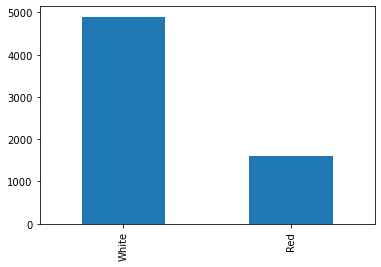

In [31]:
merchedDf['type'].value_counts().plot(kind='bar')

In [32]:
quality = df['quality'].mean(), dff['quality'].mean()
quality

(5.87790935075541, 5.6360225140712945)

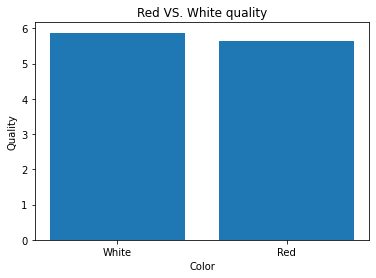

In [33]:
color = ['White', 'Red']
plt.bar(color, quality)
plt.title('Red VS. White quality')
plt.xlabel('Color')
plt.ylabel('Quality')
plt.show()

In [34]:
alcohol = df['alcohol'].mean(), dff['alcohol'].mean()
alcohol

(10.514267047774638, 10.422983114446502)

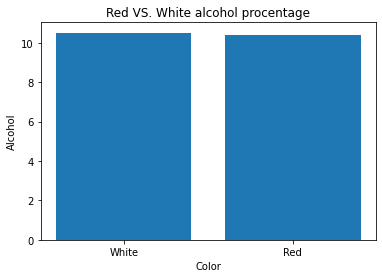

In [35]:
color = ['White', 'Red']
plt.bar(color, alcohol)
plt.title('Red VS. White alcohol procentage')
plt.xlabel('Color')
plt.ylabel('Alcohol')
plt.show()

In [36]:
sugar = df['residual sugar'].mean(), dff['residual sugar'].mean()
sugar

(6.391414863209486, 2.5388055034396517)

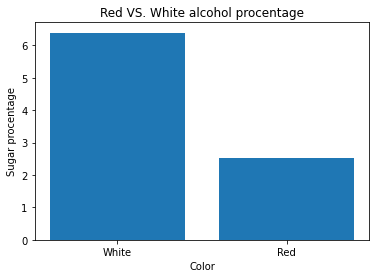

In [37]:
color = ['White', 'Red']
plt.bar(color, sugar)
plt.title('Red VS. White alcohol procentage')
plt.xlabel('Color')
plt.ylabel('Sugar procentage')
plt.show()

In [38]:
ph = merchedDf.groupby('pH').mean()
ph

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
pH,,,,,,,,,,,
2.72,10.000000,0.230000,0.270000,14.10,0.033000,45.0,166.0,0.998800,0.430000,9.700000,6.000000
2.74,9.450000,0.380000,0.725000,2.30,0.321500,21.5,64.0,0.996100,1.235000,10.100000,5.000000
2.77,9.900000,0.490000,0.230000,2.40,0.087000,19.0,115.0,0.994800,0.440000,9.400000,6.000000
2.79,8.133333,0.180000,0.323333,2.70,0.024333,12.0,74.0,0.992813,0.420000,10.366667,5.000000
2.80,8.200000,0.186667,0.336667,3.00,0.034000,31.0,85.0,0.991767,0.516667,11.200000,5.666667
...,...,...,...,...,...,...,...,...,...,...,...
3.81,6.400000,0.220000,0.340000,1.80,0.057000,29.0,104.0,0.995900,0.570000,10.300000,6.000000
3.82,5.300000,0.260000,0.230000,5.15,0.034000,48.0,160.0,0.995200,0.510000,10.500000,7.000000
3.85,4.700000,0.600000,0.170000,2.30,0.058000,17.0,106.0,0.993200,0.600000,12.900000,6.000000


In [39]:
ranges = range(5)
ph_by_color = merchedDf.groupby([(pd.cut(merchedDf.pH, ranges)), 'type']).mean()
ph_by_color

fixed acidity  volatile acidity  citric acid  residual sugar  \
pH     type                                                                  
(0, 1] Red              NaN               NaN          NaN             NaN   
       White            NaN               NaN          NaN             NaN   
(1, 2] Red              NaN               NaN          NaN             NaN   
       White            NaN               NaN          NaN             NaN   
(2, 3] Red        11.020000          0.499714     0.472857        2.365714   
       White       7.482779          0.266918     0.369022        8.014971   
(3, 4] Red         8.263124          0.528179     0.266799        2.544398   
       White       6.781639          0.279560     0.330134        6.202302   

              chlorides  free sulfur dioxide  total sulfur dioxide   density  \
pH     type                                                                    
(0, 1] Red          NaN                  NaN                   NaN       NaN   
       White        NaN                  NaN                   NaN       NaN   
(1, 2] Red          NaN                  NaN                   NaN       NaN   
       White        NaN                  NaN                   NaN       NaN   
(2, 3] Red     0.144657            14.428571             55.342857  0.997900   
       White   0.048147            32.973581            131.658513  0.994548   
(3, 4] Red     0.086245            15.907170             46.269526  0.996726   
       White   0.045496            35.580009            139.141327  0.993967   

                    pH  sulphates    alcohol   quality  
pH     type                                             
(0, 1] Red         NaN        NaN        NaN       NaN  
       White       NaN        NaN        NaN       NaN  
(1, 2] Red         NaN        NaN        NaN       NaN  
       White       NaN        NaN        NaN       NaN  
(2, 3] Red    2.935714   0.966286  10.251429  5.657143  
       White  2.947319   0.465401  10.309459  5.849315  
(3, 4] Red    3.318630   0.651332  10.424168  5.635083  
       White  3.216332   0.492694  10.538123  5.881240

In [40]:
minPh = merchedDf['pH'].min()
minPh

2.72

In [41]:
maxPh = merchedDf['pH'].max()
maxPh

4.01

In [69]:
l = (maxPh - minPh)/10
l

0.12899999999999995

In [70]:
array=[]
for i in np.arange(minPh, maxPh+0.01, l):
    array.append(i)
    print(i, end=', ')
array

2.72, 2.849, 2.978, 3.107, 3.236, 3.365, 3.494, 3.623, 3.7520000000000002, 3.8810000000000002, 4.01, 

[2.72,
 2.849,
 2.978,
 3.107,
 3.236,
 3.365,
 3.494,
 3.623,
 3.7520000000000002,
 3.8810000000000002,
 4.01]

In [71]:
ranges = array
ph = merchedDf.groupby([(pd.cut(merchedDf.pH, ranges))]).mean()
ph

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
pH,,,,,,,,,,,,
"(2.72, 2.849]",8.186667,0.275333,0.345333,2.970000,0.077800,24.200000,88.866667,0.992733,2.800000,0.560000,10.680000,5.333333
"(2.849, 2.978]",7.732934,0.276512,0.373743,7.803443,0.053368,31.516467,126.229042,0.994882,2.927335,0.487605,10.202894,5.820359
"(2.978, 3.107]",7.518329,0.298658,0.373236,6.986375,0.055118,33.745742,131.049067,0.994706,3.050543,0.506277,10.355299,5.781833
"(3.107, 3.236]",7.328091,0.318624,0.337537,5.915609,0.054645,32.874704,126.148508,0.994664,3.170730,0.512686,10.421497,5.789673
"(3.236, 3.365]",7.078924,0.358328,0.299904,4.460523,0.056080,27.851774,105.752856,0.994515,3.296260,0.548569,10.617037,5.880337
"(3.365, 3.494]",6.871072,0.395605,0.248516,3.915711,0.059616,26.826060,93.089152,0.995044,3.417743,0.572506,10.589859,5.871571
"(3.494, 3.623]",6.496578,0.474962,0.208289,3.120722,0.062376,25.207224,85.842205,0.994942,3.544867,0.588669,10.774525,5.737643
"(3.623, 3.752]",5.852542,0.419153,0.194237,3.226271,0.057932,25.338983,96.932203,0.994640,3.679661,0.642881,11.081356,5.593220
"(3.752, 3.881]",5.475000,0.328750,0.223333,1.875000,0.053750,30.583333,119.083333,0.993888,3.790833,0.575833,11.008333,6.000000


In [72]:
density = ph.groupby('density').max()
density
#maxDensity = density.max()
#maxDensity['pH']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
density,,,,,,,,,,,
0.992665,5.025000,0.617500,0.042500,1.450000,0.042500,14.500000,50.250000,3.955000,0.590000,12.725000,5.500000
0.992733,8.186667,0.275333,0.345333,2.970000,0.077800,24.200000,88.866667,2.800000,0.560000,10.680000,5.333333
0.993888,5.475000,0.328750,0.223333,1.875000,0.053750,30.583333,119.083333,3.790833,0.575833,11.008333,6.000000
0.994515,7.078924,0.358328,0.299904,4.460523,0.056080,27.851774,105.752856,3.296260,0.548569,10.617037,5.880337
0.994640,5.852542,0.419153,0.194237,3.226271,0.057932,25.338983,96.932203,3.679661,0.642881,11.081356,5.593220
0.994664,7.328091,0.318624,0.337537,5.915609,0.054645,32.874704,126.148508,3.170730,0.512686,10.421497,5.789673
0.994706,7.518329,0.298658,0.373236,6.986375,0.055118,33.745742,131.049067,3.050543,0.506277,10.355299,5.781833
0.994882,7.732934,0.276512,0.373743,7.803443,0.053368,31.516467,126.229042,2.927335,0.487605,10.202894,5.820359
0.994942,6.496578,0.474962,0.208289,3.120722,0.062376,25.207224,85.842205,3.544867,0.588669,10.774525,5.737643


### For 5 subsets: Ved at aflæse den højeste density i ovenstående tabel til at være 0.994887, kan vi sammenligne den density i ph tabellen og se at det subset med den højeste desity er [3.494, 3.752]

### For 10 subsets: Ved at aflæse den højeste density i ovenstående tabel til at være 0.995044, kan vi sammenligne den density i ph tabellen og se at det subset med den højeste desity er [3.365, 3.494]

In [77]:
merchedDf.corr(method ='pearson')
#df.corr(method ='pearson')
#dff.corr(method ='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


#### Alcohol giver den bedste vin kvalitet